# 개념정리
- 계층적 트리 모형을 이용해 개별 개체들을 순차적, 계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘
- K-means 군집화와 달리 군집수를 사전에 정하지 않아도 됨(Dendrogram 이용)
- 거리 또는 유사도를 기반으로 클러스터를 형성하는 알고리즘

## Agglomerative Method : 응집형 계층적 클러스터링
- 각 데이터 지점에서 시작해 유사한 지점들을 함께 결합해 클러스터를 형성(Bottom-Up 방식)
- 연결 기준에 따라 군집이 달라지므로 데이터 특성, 분포에 따라 적절히 변경하며 확인해야 한다.
- 연결 기준(유클리디안 거리)
    1. single Linkage : 두 클러스터 내의 가장 가까운 점 사이의 거리
        - 먼 거리에 있는 이상한 데이터의 영향을 최소화 할 수 있다.
    2. complete Linkage : 두 클러스터 내의 가장 먼 점 사이의 거리
        - 클러스터 거리가 멀고 클러스터의 밀집도가 높을 경우 좋은 결과를 낸다
    3. average Linkage : 두 클러스터 내의 모든 점 사이의 평균 거리
        - 무난한 방법이나 데이터에 노이즈가 많고 중심점이 명확하지 않으면 잘 동작하지 않을 수 있다.

# 라이브러리 로딩

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%config Completer.use_jedi = False
%matplotlib inline
%config InlineBackend.figure_foramt = 'retina'

plt.rc('font', family='D2coding')
mpl.rc('axes', unicode_minus=False)

sns.set(font='D2coding', rc={'axes.unicode_minus':False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터셋 로딩

In [9]:
from sklearn.datasets import load_wine
wine = load_wine()

In [10]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [11]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## 데이터프레임으로 변형

In [14]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns=columns)
print(df.shape)

(178, 13)


## 덴드로그램 시각화
- 적절한 k값을 찾는 방법

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [17]:
clusters_single = linkage(y=data, method='single', metric='euclidean')
clusters_average = linkage(y=data, method='average', metric='euclidean')
clusters_complete = linkage(y=data, method='complete', metric='euclidean')

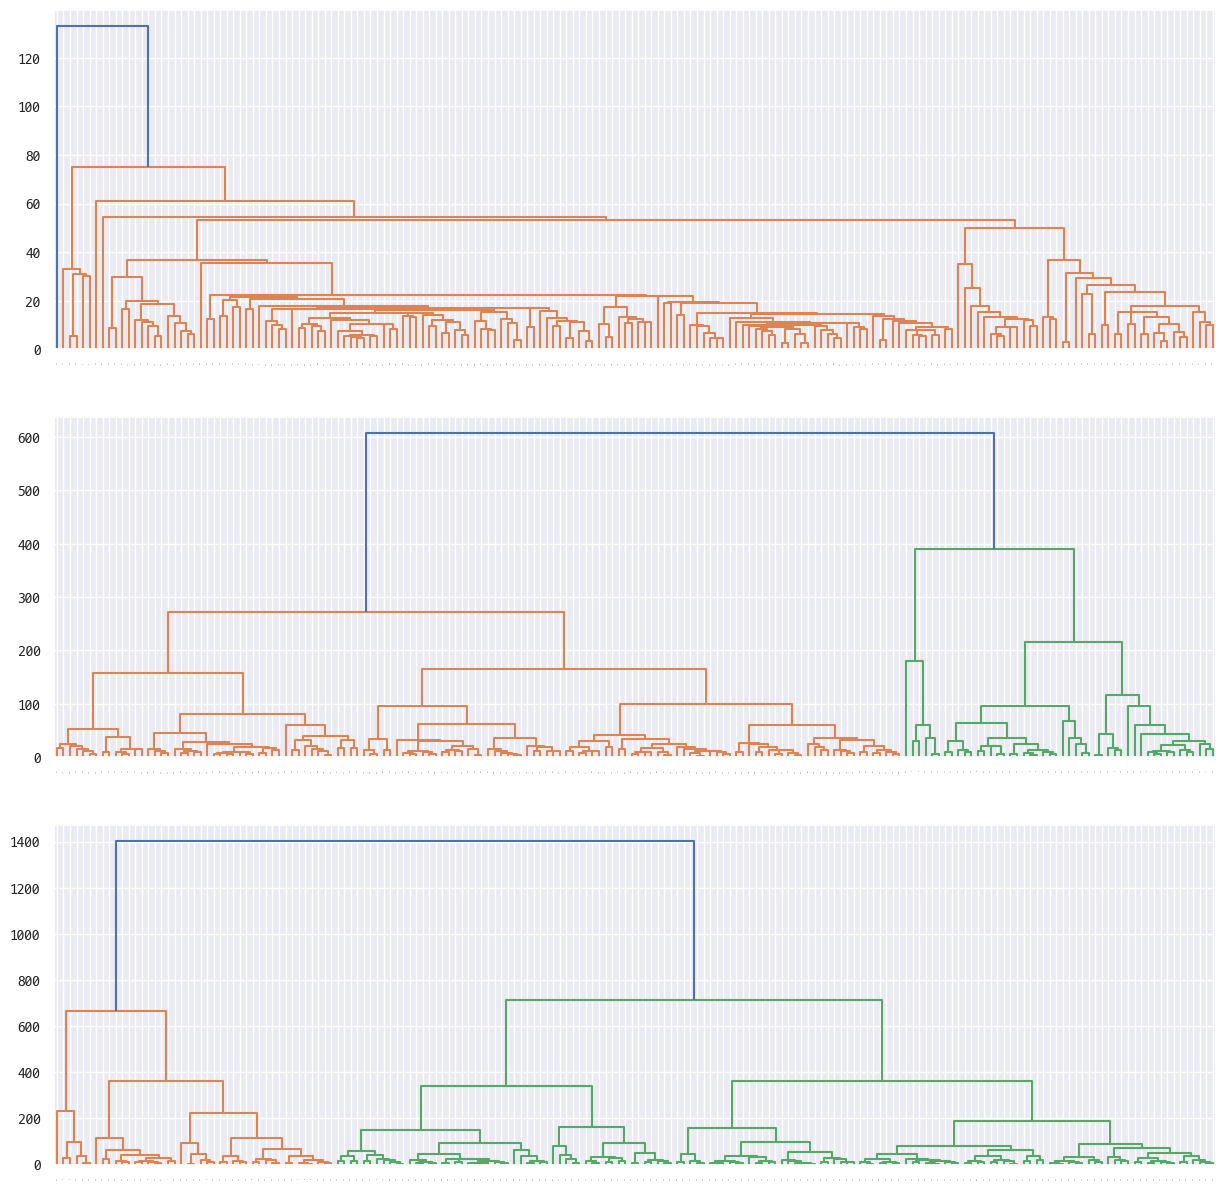

In [18]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(15, 15)

ax1 = dendrogram(clusters_single, leaf_font_size=0, ax=axes[0])
ax2 = dendrogram(clusters_average, leaf_font_size=0, ax=axes[1])
ax3 = dendrogram(clusters_complete, leaf_font_size=0, ax=axes[2])

- wine 데이터셋의 특성상 single linkage는 피해야한다.
- 군집의 수는 3또는 4개가 적당해 보인다.

## 데이터 전처리 - 피처 스케일링과 PCA

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:, :] = scaler.fit_transform(data)
df.describe().loc[['mean', 'std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,6.611440e-17,1.010428e-16,2.869116e-17,2.282818e-16,-2.494883e-17,-4.709092e-17,-1.534353e-16,5.114511e-17,-1.699639e-16,6.860929e-17,3.430464e-16,-2.869116e-17,2.681999e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
data = pca.fit_transform(data)

## Agglomerative Clustering - Single Linkage

In [24]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
single_clusters = single_clustering.fit_predict(data)

In [26]:
temp = pd.DataFrame(data, columns=['pca1', 'pca2'])
temp['single'] = single_clusters

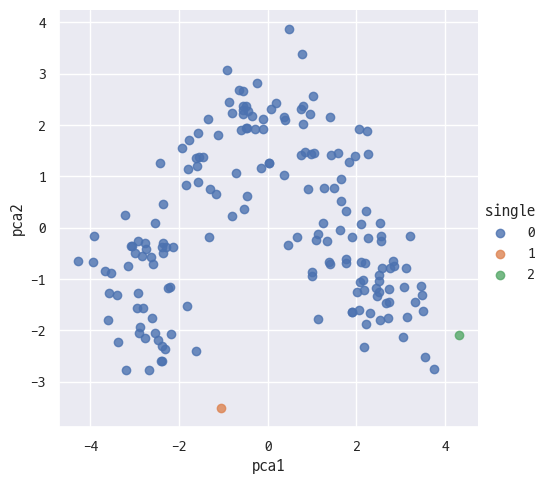

In [28]:
sns.lmplot(x='pca1', y='pca2', data=temp, hue='single', fit_reg=False)
plt.show()

## Agglomerative Clustering - Average Linkage

In [35]:
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
average_clusters = average_clustering.fit_predict(data)
temp['average'] = average_clusters

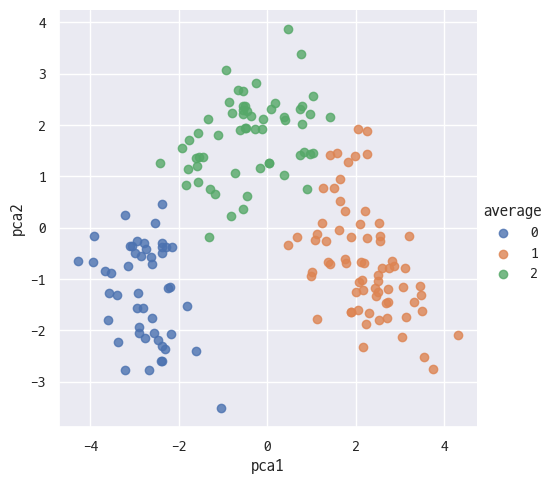

In [36]:
sns.lmplot(x='pca1', y='pca2', data=temp, hue='average', fit_reg=False)
plt.show()

## Agglomerative Clustering - Complete Linkage

In [37]:
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_clusters = complete_clustering.fit_predict(data)
temp['complete'] = complete_clusters

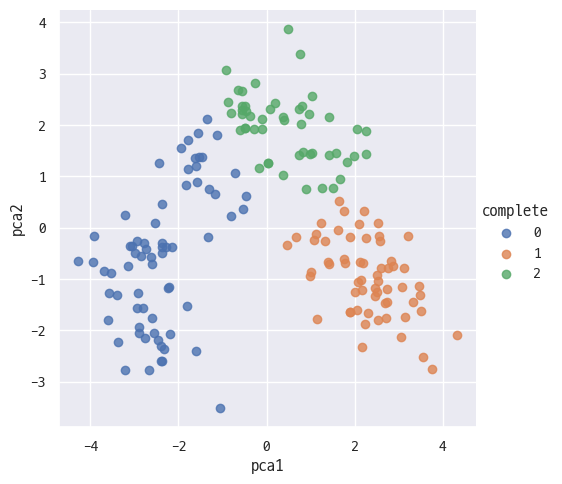

In [38]:
sns.lmplot(x='pca1', y='pca2', data=temp, hue='complete', fit_reg=False)
plt.show()